<a href="https://colab.research.google.com/github/fabribara/DataScience/blob/main/PouplationDataWorldBankLATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Migration & Population Density WorldBank 1960-2018](https://www.kaggle.com/datasets/eliasdabbas/migration-data-worldbank-1960-2018)


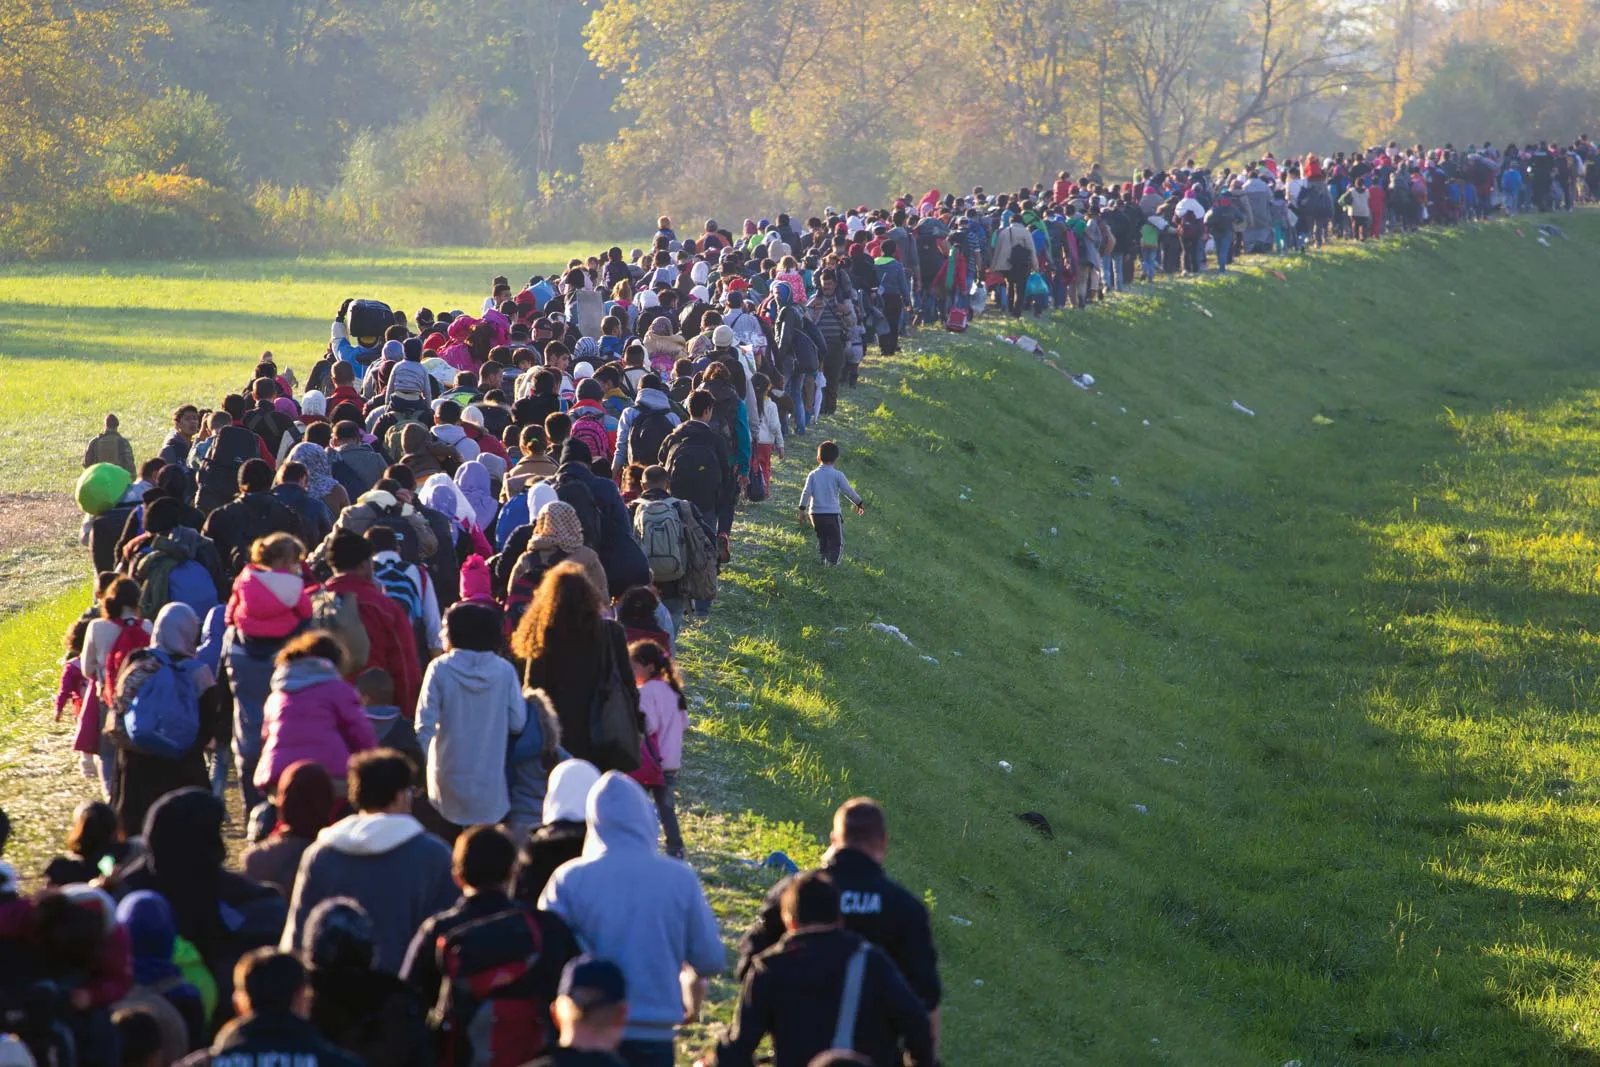





**Acerca de Este Conjunto de Datos**

*Contexto y posibles preguntas que se pueden contestar con este conjunto de datos*
:

Temas de población y su movimiento en el munto y cómo han cambiado a través del tiempo, de dónde a dónde se observan movimientos de personas y qué tan poblados han estado los países desde 1960.

En este Notebook se filtrarán las métricas asociadas a los países de LATAM


*Contenido*

Se mezclaron tres conjuntos de datos en uno solo:
Población
Migración
Densidad Poblacional

*Créditos*

Banco Mundual


*Motivación*

El problema de movimiento de personas afecta en gran medida el triángulo norte de Centroamérica y México, es interesante entender el problema con datos cuantitativos y sería deseable resolver toda la problemática dervida de este fenómeno.

In [ ]:
#https://www.kaggle.com/datasets/eliasdabbas/migration-data-worldbank-1960-2018
import pandas as pd
from pandas_datareader import wb

wb_countries = wb.get_countries()
country_list = wb_countries[wb_countries['region']!='Aggregates']['name'].reset_index(drop=True)

indicator_ids = ['EN.POP.DNST', 'SP.POP.TOTL', 'SM.POP.NETM']

migration = wb.WorldBankReader(symbols=['SM.POP.NETM'], start=1950, end=2018, countries='all').read()
pop_density = wb.WorldBankReader(symbols=['EN.POP.DNST'], start=1950, end=2018, countries='all').read()
population = wb.WorldBankReader(symbols=['SP.POP.TOTL'], start=1950, end=2018, countries='all').read()

pop_density_countries = pop_density.reset_index()#.query('country in @country_list').reset_index(drop=True)
population_countries = population.reset_index()#.query('country in @country_list').reset_index(drop=True)
migration_countries = migration.reset_index()#.query('country in @country_list').reset_index(drop=True)

pop_density_merged = pd.merge(population_countries, pop_density_countries, on=['country', 'year'], how='outer')
migration_final = (pd.merge(pop_density_merged, migration_countries, on=['country', 'year'], how='outer')
                   .rename(columns={'SP.POP.TOTL': 'population',
                                    'EN.POP.DNST': 'pop_density',
                                    'SM.POP.NETM': 'net_migration'})
                   .assign(migration_perc=lambda df: df['net_migration'].div(df['population'])))

migration_final = pd.merge(migration_final, wb_countries, how='left', left_on='country', right_on='name')
migration_final.drop('name', axis=1).to_csv('migration_population.csv', index=False)


In [ ]:
migration_final.head()
 #

,country,year,population,pop_density,net_migration,migration_perc,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,Africa Eastern and Southern,2018,643090131.0,43.431367,NaN,NaN,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
1,Africa Eastern and Southern,2017,626392880.0,42.303709,-791282.0,-0.001263,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,Africa Eastern and Southern,2016,609978946.0,41.195114,NaN,NaN,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
3,Africa Eastern and Southern,2015,593871847.0,40.107067,NaN,NaN,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,Africa Eastern and Southern,2014,578075373.0,39.040385,NaN,NaN,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [ ]:
migration_final[migration_final['region'].str.contains('Latin America &', na=False)]

,country,year,population,pop_density,net_migration,migration_perc,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
3245,Antigua and Barbuda,2018,96282.0,218.822727,NaN,NaN,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,,High income,IBRD,Saint John's,-61.8456,17.1175
3246,Antigua and Barbuda,2017,95425.0,216.875000,0.0,0.000000,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,,High income,IBRD,Saint John's,-61.8456,17.1175
3247,Antigua and Barbuda,2016,94520.0,214.818182,NaN,NaN,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,,High income,IBRD,Saint John's,-61.8456,17.1175
3248,Antigua and Barbuda,2015,93571.0,212.661364,NaN,NaN,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,,High income,IBRD,Saint John's,-61.8456,17.1175
3249,Antigua and Barbuda,2014,92562.0,210.368182,NaN,NaN,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,,High income,IBRD,Saint John's,-61.8456,17.1175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15453,Virgin Islands (U.S.),1964,40800.0,116.571429,NaN,NaN,VIR,VI,Virgin Islands (U.S.),Latin America & Caribbean,,High income,Not classified,Charlotte Amalie,-64.8963,18.3358
15454,Virgin Islands (U.S.),1963,39800.0,113.714286,NaN,NaN,VIR,VI,Virgin Islands (U.S.),Latin America & Caribbean,,High income,Not classified,Charlotte Amalie,-64.8963,18.3358
15455,Virgin Islands (U.S.),1962,35000.0,100.000000,10270.0,0.293429,VIR,VI,Virgin Islands (U.S.),Latin America & Caribbean,,High income,Not classified,Charlotte Amalie,-64.8963,18.3358
15456,Virgin Islands (U.S.),1961,34300.0,98.000000,NaN,NaN,VIR,VI,Virgin Islands (U.S.),Latin America & Caribbean,,High income,Not classified,Charlotte Amalie,-64.8963,18.3358


**Datos Para LATAM**

In [ ]:
latam_data=migration_final.loc[migration_final['region'].str.contains('Latin',na=False)].sort_values(by=['country','year'], ascending=False)[['country','year','population','net_migration','pop_density']]
latam_data

,country,year,population,net_migration,pop_density
15399,Virgin Islands (U.S.),2018,107001.0,NaN,305.717143
15400,Virgin Islands (U.S.),2017,107281.0,-2254.0,306.517143
15401,Virgin Islands (U.S.),2016,107516.0,NaN,307.188571
15402,Virgin Islands (U.S.),2015,107712.0,NaN,307.748571
15403,Virgin Islands (U.S.),2014,107882.0,NaN,308.234286
...,...,...,...,...,...
3299,Antigua and Barbuda,1964,57641.0,NaN,131.002273
3300,Antigua and Barbuda,1963,56701.0,NaN,128.865909
3301,Antigua and Barbuda,1962,55849.0,-1880.0,126.929545
3302,Antigua and Barbuda,1961,55005.0,NaN,125.011364
